# HW03: BMW vs Volkswagen
### Alejandro José Gómez Rivas

## LIBRERÍAS RECURRIDAS

In [131]:
import yfinance as yf
from yahoofinancials import YahooFinancials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from arch.univariate import ARX
from arch.univariate import ARCH, GARCH
from sktime.utils.plotting import plot_correlations
import statsmodels.api as sm
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests

## OBJETIVO
El objetivo del presente trabajo es analizar los datos de Volkswagen y BMW con el fin de responder a una serie de cuestiones, como estimar un modelo VAR, un modelo GARCH con el activo BMW o la predicción.

## INTRODUCCIÓN

Sacamos los datos de Volkswagen y de BMW de Yahoo Finance usando su librería correspondiente en un intervalo diario entre enero del 2009 a octubre del 2020 mensual.

In [143]:
datos = ['VOW.DE', 'BMW.DE']
data_clean = yf.download(datos, start='2009-01-01', 
                       end='2020-10-31', 
                       interval='1mo')

data_clean = data_clean["Adj Close"] 

[*********************100%***********************]  2 of 2 completed


Se limpian los datos NA:

In [144]:
data_clean = data_clean.dropna()

In [157]:
data_clean

,BMW.DE,VOW.DE
Date,,
2009-01-01,11.898609,192.005600
2009-02-01,12.627487,144.706543
2009-03-01,13.931797,178.035278
2009-04-01,16.783369,184.139084
2009-05-01,16.236712,165.715958
...,...,...
2020-06-01,54.252777,136.308868
2020-07-01,52.228565,126.226013
2020-08-01,57.432327,142.872238


A continuación, mediante el uso de la librería de _seaborn_, haremos las representaciones gráficas de los precios de cierre ajustado:

<AxesSubplot:xlabel='Date'>

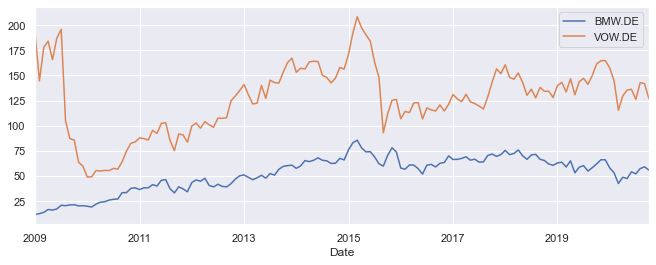

In [145]:
data_clean.plot()

Hay varios momentos clave en los precios de cierre de Volkswagen:

- Finales 2009: se observa una caída muy grande, probablemente coincidente con la crisis financiera correspondiente a esos años. 
- A mediados del 2015: esta caída es debido al caso Dieselgate de la casa Volkswagen, el escándalo de emisiones contaminantes de sus vehículos debido a que introdujeron un software en los motores diésel de sus automóviles para pasar las pruebas de emisiones. 
- Principios del 2020: se observa otra caída pronunciada, probablemente provocada por la incertidumbre en los mercados por la actual pandemia del COVID-19.

En el caso de BMW, se aprecia un crecimiento constante desde el 2009 hasta el 2015, donde se intuye un punto máximo que dataría de algún momento de principios de dicho año 2015. Por otro lado, se observa una caída muy pronunciada a comienzos del 2020, también muy probablemente relacionada por la pandemia de Covid-19.

Ahora se hace un cálculo de la tasa de variación logarítmica.


In [115]:
stocks_retorno = np.log(data_clean).diff().dropna() # tasa variación logarítmica
stocks_retorno 

,BMW.DE,VOW.DE
Date,,
2009-02-01,0.059454,-0.282816
2009-03-01,0.098298,0.207273
2009-04-01,0.186215,0.033710
2009-05-01,-0.033114,-0.105416
2009-06-01,0.067534,0.121788
...,...,...
2020-06-01,0.131735,0.006300
2020-07-01,-0.038025,-0.076849
2020-08-01,0.094978,0.123877


## Test de Granger
Lo hacemos de 4 retardos

In [133]:
gc_res = grangercausalitytests(stocks_retorno[['BMW.DE','VOW.DE']], 4) 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5341  , p=0.2176  , df_denom=137, df_num=1
ssr based chi2 test:   chi2=1.5677  , p=0.2105  , df=1
likelihood ratio test: chi2=1.5590  , p=0.2118  , df=1
parameter F test:         F=1.5341  , p=0.2176  , df_denom=137, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3759  , p=0.2562  , df_denom=134, df_num=2
ssr based chi2 test:   chi2=2.8544  , p=0.2400  , df=2
likelihood ratio test: chi2=2.8255  , p=0.2435  , df=2
parameter F test:         F=1.3759  , p=0.2562  , df_denom=134, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0049  , p=0.3929  , df_denom=131, df_num=3
ssr based chi2 test:   chi2=3.1758  , p=0.3653  , df=3
likelihood ratio test: chi2=3.1398  , p=0.3706  , df=3
parameter F test:         F=1.0049  , p=0.3929  , df_denom=131, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8438  , p=0.4999  

## Modelo VAR mensual

In [120]:
# VAR
modelo = VAR(stocks_retorno)

C:\Users\alexg\anaconda3\envs\predictions\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [121]:
modelo_fit = modelo.fit(24, ic = 'aic')

In [123]:
modelo_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 25, Nov, 2021
Time:                     19:50:14
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -9.70721
Nobs:                     140.000    HQIC:                  -9.78205
Log likelihood:           297.027    FPE:                5.36372e-05
AIC:                     -9.83328    Det(Omega_mle):     5.14103e-05
--------------------------------------------------------------------
Results for equation BMW.DE
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.009969         0.007129            1.398           0.162
L1.BMW.DE         0.040624         0.104033            0.390           0.696
L1.VOW.DE        -0.096545         0.077948           -1.239           0.21

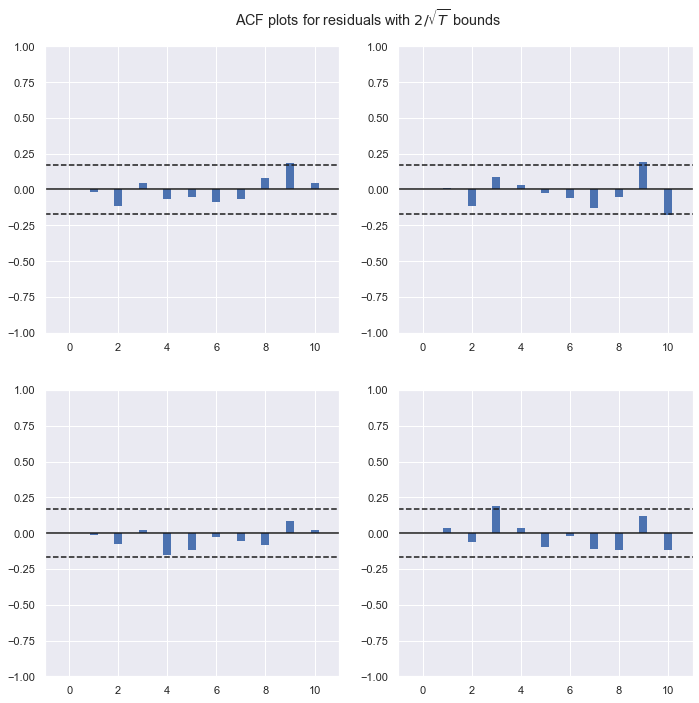

In [124]:
# Residuos: para comprobar que el modelo se comporta como si fuera ruido blanco
modelo_fit.plot_acorr();

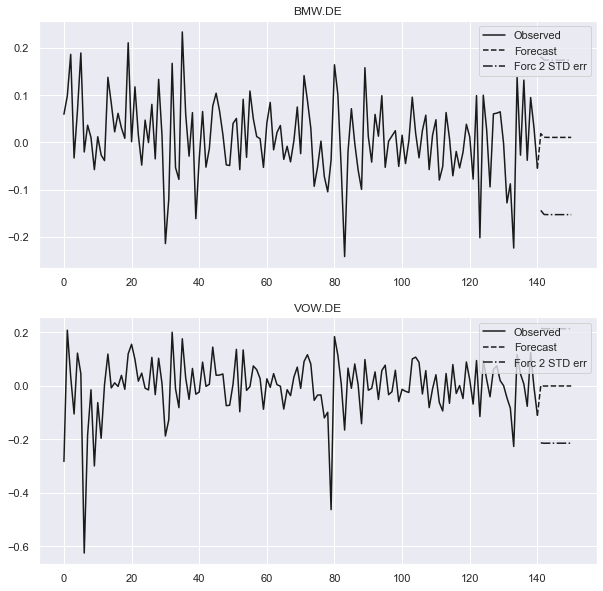

In [135]:
modelo_fit.plot_forecast(10);

## Modelo GARCH

Volvemos a sacar los datos de BMW pero en esta ocasional de a diario:

In [125]:
yf = YahooFinancials('BMW.DE')

data_bmw = yf.get_historical_price_data(start_date='2009-01-01', 
                                    end_date='2020-10-31', 
                                    time_interval='daily')

bmw_df = pd.DataFrame(data_bmw['BMW.DE']['prices'])
bmw_df.tail()

,date,high,low,open,close,volume,adjclose,formatted_date
2998,1603699200,64.120003,62.779999,62.860001,63.209999,1118941,60.354069,2020-10-26
2999,1603785600,63.290001,61.340000,63.230000,61.470001,1839591,58.692688,2020-10-27
3000,1603872000,59.959999,57.250000,59.730000,58.060001,3729376,55.436756,2020-10-28
3001,1603958400,58.959999,57.580002,57.860001,58.330002,1788596,55.694557,2020-10-29
3002,1604044800,58.869999,57.369999,57.400002,58.680000,1564460,56.028740,2020-10-30


Seleccionamos el precio de cierre ajustado para obtener nuestras series temporales de BMW. 

In [126]:
# Select adj close BMW
databmw = vow_df[['formatted_date', 'adjclose']].rename(columns={'adjclose': 'Price', 'formatted_date' : 'Date'})
databmw['Date'] = pd.to_datetime(databmw['Date'])
databmw=databmw.set_index('Date')
databmw.tail()

,Price
Date,
2020-05-31,54.252777
2020-06-30,52.228565
2020-07-31,57.432327
2020-08-31,59.189190
2020-09-30,56.028740


Ahora se hace un cálculo de la tasa de variación logarítmica y al cuadrado, que es la volatilidad proxy.

In [10]:
# Log return BMW

databmw['log_ret'] =np.log(databmw.Price).diff()
databmw.tail()

,Price,log_ret
Date,,
2020-10-26,60.354069,-0.011326
2020-10-27,58.692684,-0.027913
2020-10-28,55.436756,-0.057072
2020-10-29,55.694557,0.004640
2020-10-30,56.028740,0.005982


In [12]:
# Squared Log return BMW

databmw['Squared'] =databmw['log_ret']**2
databmw.tail()

,Price,log_ret,Squared
Date,,,
2020-10-26,60.354069,-0.011326,0.000128
2020-10-27,58.692684,-0.027913,0.000779
2020-10-28,55.436756,-0.057072,0.003257
2020-10-29,55.694557,0.004640,0.000022
2020-10-30,56.028740,0.005982,0.000036


Ahora, una vez sacado los cálculos, vamos a graficarlo. El primer subplot corresponde al precio de cierre del activo, el segundo gráfico, a la tasa de variación logarítmica y el tercero, a la tasa de variación al cuadrado. 

Text(0.5, 0.8, 'Volatilidad')

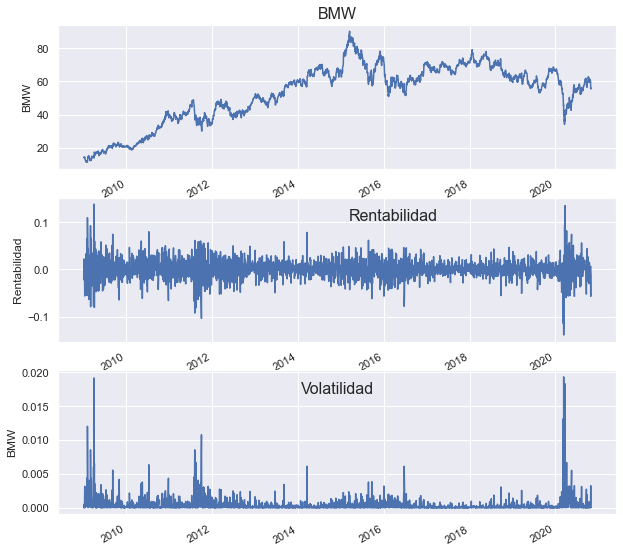

In [14]:
fig_bmw = plt.figure(figsize=(10,10))
plt.subplot(311)
ax_bmw = databmw.Price.plot( linestyle='-')
ax_bmw.set_ylabel('BMW')
ax_bmw.set_xlabel('')
ax_bmw.set_title('BMW', y = 1, fontsize = 16)
plt.subplot(312)
ax_bmw = databmw.log_ret.plot( linestyle = '-')
ax_bmw.set_ylabel('Rentabilidad')
ax_bmw.set_xlabel('')
ax_bmw.set_title('Rentabilidad', y = 0.8, x = 0.6,fontsize = 16)
plt.subplot(313)
ax_bmw = databmw.Squared.plot( linestyle = '-')
ax_bmw.set_ylabel('BMW')
ax_bmw.set_xlabel('')
ax_bmw.set_title('Volatilidad', y = 0.8, fontsize = 16)



Se representan los residuos gráficamente en ACF y PACF. A simple vista parece que no son ruido blanco.

A continuación, se va a realizar un contraste de hipótesis para verificar si la media es cero o no.

- Si alpha > p-value --> Se rechaza la hipótesis de media cero
- Si alpha < p-value --> No se rechaza la hipótesis de media cero


In [16]:
# mean zero BMW
alpha = 0.05
t, p = stats.ttest_1samp(databmw['log_ret'].dropna(),0.0)
print ('Estadístico t:',t)
print ('p-value:',p)

if  p < alpha:
    print (f'Con {alpha} de significación: Rechazamos la hipotesis de media cero.')
else:
    print (f'Con {alpha} de significación: No podemos rechazar la hipotesis de media cero.')

Estadístico t: 1.2749738428223647
p-value: 0.20241719951170387
Con 0.05 de significación: No podemos rechazar la hipotesis de media cero.


Nos está diciendo que, con un valor 0.05 de significación, no podemos rechazar la hipótesis de cero, es decir, nos está diciendo que la media es cero. 



In [20]:
bmw_vol=databmw['Squared'].astype('float64').to_period('D').sort_index().dropna()
bmw_vol.tail()

Date
2020-10-26    0.000128
2020-10-27    0.000779
2020-10-28    0.003257
2020-10-29    0.000022
2020-10-30    0.000036
Freq: D, Name: Squared, dtype: float64

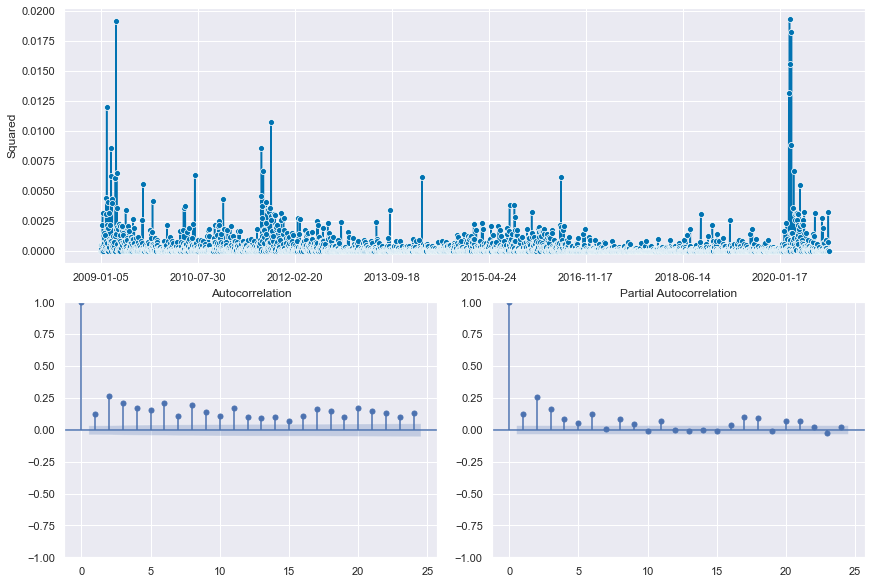

In [21]:
# Plot Autocorrelation
plot_correlations(bmw_vol);

Se observa que tenemos un problema de autocorrelación y, por tanto, de Garch, porque los rendimientos al cuadrado tienen autocorrelación. Para comprobarlo, hacemos el modelo estadístico.

Ahora se realiza el test de Ljung-Box para manejar la hipótesis nula de que los residuos son ruido blanco.

In [22]:
# import function test Ljung_Box
test_Ljung_Box = sm.stats.acorr_ljungbox

In [176]:
# pvalue < alpha -> No Ruido Blanco
test_Ljung_Box(bmw_vol, lags=[12], return_df=True)

,lb_stat,lb_pvalue
12,1019.706643,1.086006e-210


Observamos que se rechaza la hipótesis nula, por lo que hay autocorrelación, hay problema Garch. Miraremos ahora el test LM.

# Test LM

In [25]:
# import function test LM-Arch
test_LM_ARCH=sm.stats.diagnostic.het_arch

In [30]:
#
# testing LM-ARCH
# pvalue < alpha -> ARCH
lm, lmpval, f, pval, result_int_bmw =test_LM_ARCH(databmw['log_ret'].dropna(), nlags=20, store=True)
print ('Estadístico LM: ', lm)
print ('p-value: ', lmpval)
print ('Estadístico F: ', f)
print ('p-value: ', pval)
# la hipotesis nula es que no hay garch

Estadístico LM:  478.0153380974275
p-value:  1.1556544500270884e-88
Estadístico F:  28.26302088909431
p-value:  3.2441793054663064e-97


In [31]:
result_int_bmw.resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     28.26
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           3.24e-97
Time:                        04:15:57   Log-Likelihood:                 16519.
No. Observations:                2982   AIC:                        -3.300e+04
Df Residuals:                    2961   BIC:                        -3.287e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.688e-05   2.27e-05      4.275      0.000    5.24e-05       0.000
x1             0.0096      0.018      0.526      0.599      -0.026       0.046
x2             0.1829      0.018      9.975      0.000       0.147       0.219
x3             0.1108      0.019      5.954      0.000       0.074       0.147
x4             0.0476      0.019      2.554      0.011       0.011       0.084
x5             0.0316      0.019      1.692      0.091      -0.005       0.068
x6             0.0952      0.019      5.104      0.000       0.059       0.132
x7            -0.0083      0.019     -0.442      0.658      -0.045       0.028
x8             0.0737      0.019      3.932      0.000       0.037       0.110
x9             0.0209      0.019      1.114      0.265      -0.016       0.058
x10           -0.0146      0.019     -0.777      0.437      -0.051       0.022
x11            0.0591      0.019      3.154      0.002       0.022       0.096
x12           -0.0156      0.019     -0.831      0.406      -0.052       0.021
x13           -0.0203      0.019     -1.087      0.277      -0.057       0.016
x14           -0.0275      0.019     -1.471      0.141      -0.064       0.009
x15           -0.0440      0.019     -2.365      0.018      -0.081      -0.008
x16            0.0132      0.019      0.706      0.480      -0.023       0.050
x17            0.0901      0.019      4.843      0.000       0.054       0.127
x18            0.0776      0.019      4.181      0.000       0.041       0.114
x19           -0.0093      0.018     -0.508      0.612      -0.045       0.027
x20            0.0712      0.018      3.888      0.000       0.035       0.107
==============================================================================
Omnibus:                     4269.560   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1787784.973
Skew:                           8.287   Prob(JB):                         0.00
Kurtosis:                     121.802   Cond. No.                     1.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Se confirma que hay GARCH, por lo que procedemos a estimar un modelo GARCH (1,1)

# GARCH(1,1)

In [33]:
ar_bmw = ARX(100*databmw['log_ret'].dropna(), lags=[1])
print(ar_bmw.fit().summary())

                     AR - Constant Variance Model Results                     
Dep. Variable:                log_ret   R-squared:                       0.002
Mean Model:                        AR   Adj. R-squared:                  0.002
Vol Model:          Constant Variance   Log-Likelihood:               -6268.55
Distribution:                  Normal   AIC:                           12543.1
Method:            Maximum Likelihood   BIC:                           12561.1
                                        No. Observations:                 3001
Date:                Wed, Nov 24 2021   Df Residuals:                     2999
Time:                        04:16:03   Df Model:                            2
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const          0.0442  3.573e-02      1.236      0.216 

In [35]:
ar_bmw.volatility = GARCH(p=1,q=1)
res_bmw = ar_bmw.fit(update_freq=0, disp="off")
print(res_bmw.summary())

                           AR - GARCH Model Results                           
Dep. Variable:                log_ret   R-squared:                       0.002
Mean Model:                        AR   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -5882.24
Distribution:                  Normal   AIC:                           11774.5
Method:            Maximum Likelihood   BIC:                           11804.5
                                        No. Observations:                 3001
Date:                Wed, Nov 24 2021   Df Residuals:                     2999
Time:                        04:16:08   Df Model:                            2
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
Const          0.0588  2.973e-02      1.978  4.792e-02 [5.378e-0

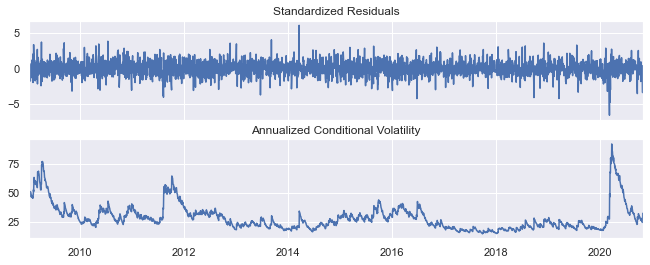

In [37]:
fig = res_bmw.plot(annualize="D")

In [39]:
# Análisis Residuos
mod1_std_resid_bmw=(res_bmw.resid / res_bmw.conditional_volatility).astype('float64').to_period('D').sort_index().dropna()

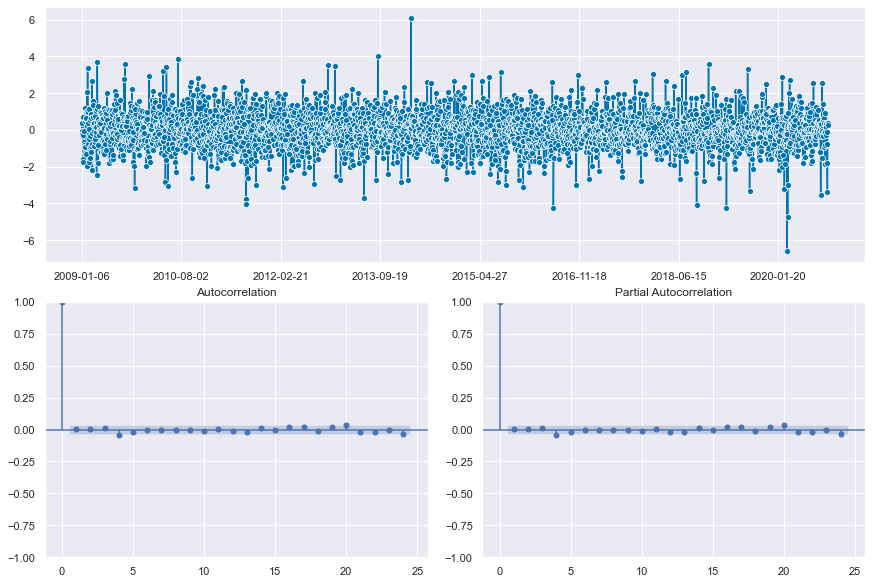

In [41]:
# Plot Autocorrelation
plot_correlations(mod1_std_resid_bmw);

(<Figure size 864x576 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:title={'center':'Autocorrelation'}>,
        <AxesSubplot:title={'center':'Partial Autocorrelation'}>],
       dtype=object))

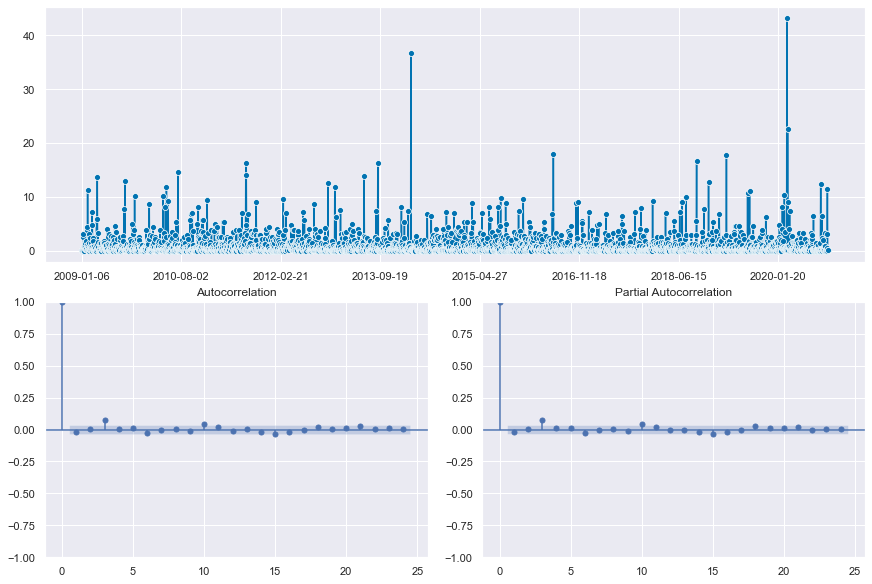

In [49]:
# Plot Autocorrelation
plot_correlations(mod1_std_resid_bmw**2)

In [128]:
#
# testing Ljung-Box
# pvalue < alpha -> No Ruido Blanco
test_Ljung_Box(mod1_std_resid_bmw**2, lags=[12], return_df=True)

,lb_stat,lb_pvalue
12,37.261392,0.000203


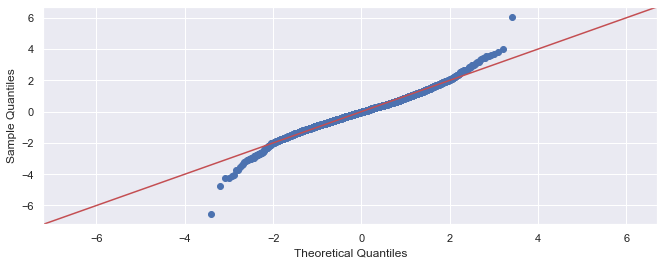

In [52]:
# qqplot
sm.qqplot(mod1_std_resid_bmw,line='45')
plt.show()
# Aqui se ve que no cumple

## GARCH (1, 1) con T-STUDENT

In [56]:
#
from arch.univariate import StudentsT

In [58]:
ar_bmw.distribution = StudentsT()
res_bmw = ar_bmw.fit(update_freq=0, disp="off")
print(res_bmw.summary())

                              AR - GARCH Model Results                              
Dep. Variable:                      log_ret   R-squared:                       0.002
Mean Model:                              AR   Adj. R-squared:                  0.001
Vol Model:                            GARCH   Log-Likelihood:               -5795.19
Distribution:      Standardized Student's t   AIC:                           11602.4
Method:                  Maximum Likelihood   BIC:                           11638.4
                                              No. Observations:                 3001
Date:                      Wed, Nov 24 2021   Df Residuals:                     2999
Time:                              18:31:18   Df Model:                            2
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
C

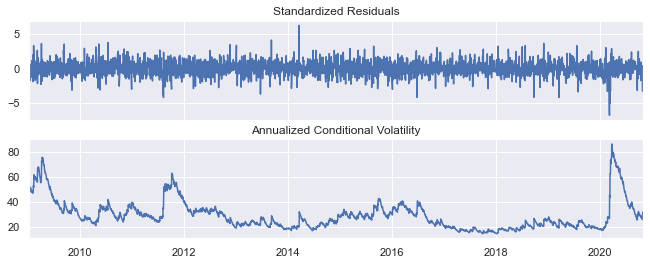

In [59]:
fig_bmw = res_bmw.plot(annualize="D")

In [60]:
# Análisis Residuos
mod1_std_resid_bmw=(res_bmw.resid / res_bmw.conditional_volatility).astype('float64').to_period('D').sort_index().dropna()

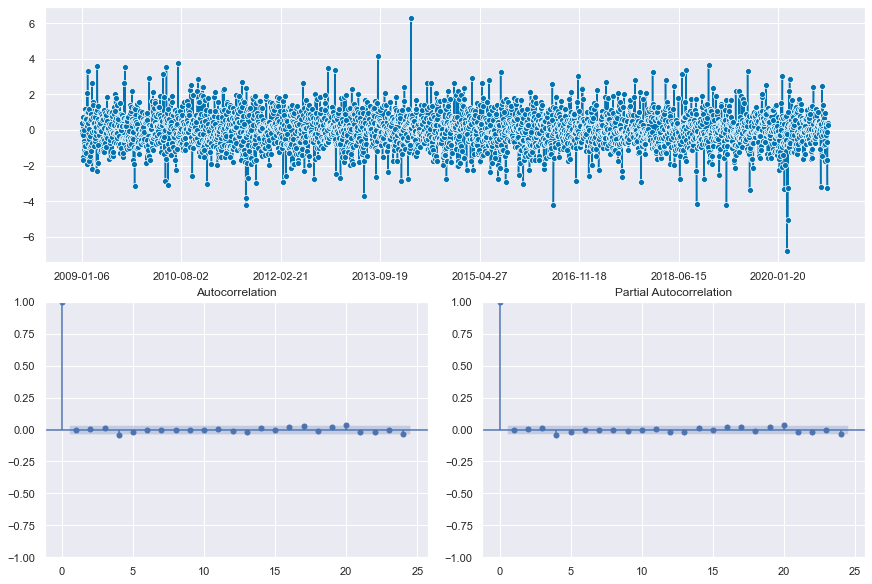

In [62]:
# Plot Autocorrelation
plot_correlations(mod1_std_resid_bmw);
# No tiene efecto GARCH

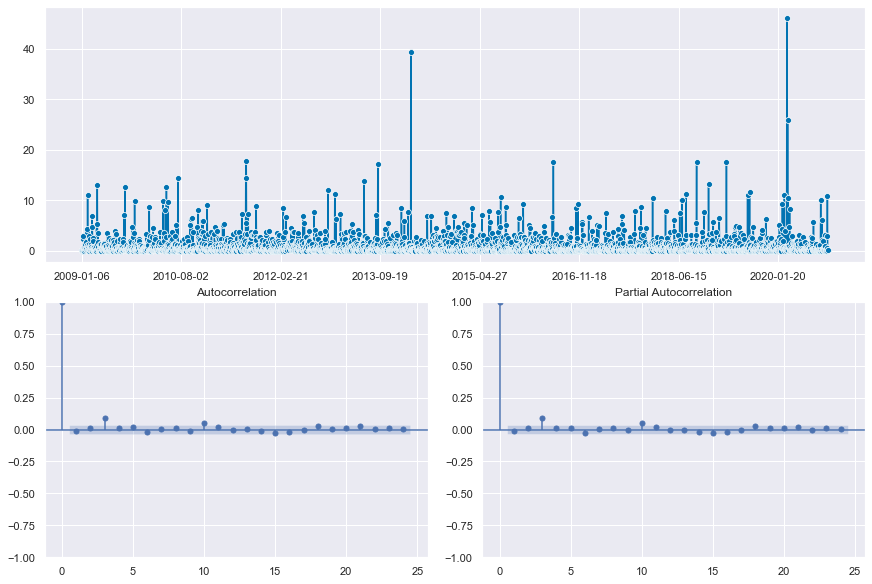

In [64]:
# Plot Autocorrelation
plot_correlations(mod1_std_resid_bmw**2);

In [129]:
#
# testing Ljung-Box
# pvalue < alpha -> No Ruido Blanco
test_Ljung_Box(mod1_std_resid_bmw**2, lags=[12], return_df=True)

,lb_stat,lb_pvalue
12,37.261392,0.000203


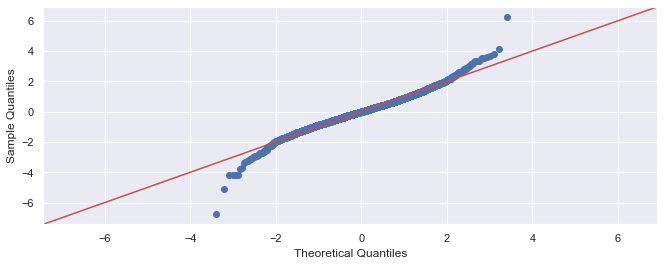

In [66]:
# qqplot normal
sm.qqplot(mod1_std_resid_bmw,line='45')
plt.show()

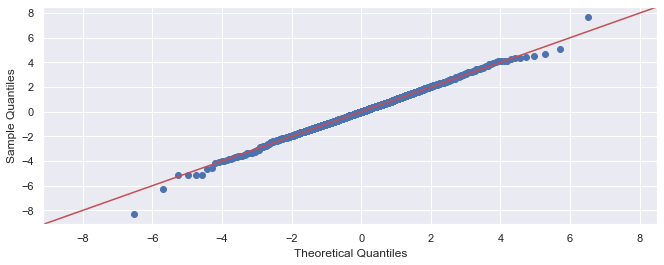

In [67]:
# qqplot t-student 
sm.qqplot(mod1_std_resid_bmw,dist=stats.t,fit=True,line='45')
plt.show()

## Predicción de la volatilidad 

In [68]:
# Predicción 30 días
forecasts_bmw = res_bmw.forecast(horizon=30, reindex=False)

In [69]:
# Mean
forecasts_bmw.mean

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.21,h.22,h.23,h.24,h.25,h.26,h.27,h.28,h.29,h.30
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-30,0.068009,0.032163,0.02974,0.029576,0.029565,0.029564,0.029564,0.029564,0.029564,0.029564,...,0.029564,0.029564,0.029564,0.029564,0.029564,0.029564,0.029564,0.029564,0.029564,0.029564


In [71]:
# Varianza
(forecasts_bmw.variance**0.5)*np.sqrt(252) # datos de diarios a anuales

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.21,h.22,h.23,h.24,h.25,h.26,h.27,h.28,h.29,h.30
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-30,30.741205,30.815357,30.81966,30.823627,30.827578,30.831511,30.835429,30.839331,30.843217,30.847087,...,30.888626,30.892311,30.89598,30.899634,30.903274,30.906898,30.910508,30.914103,30.917684,30.92125
